In [1]:
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
tstart = dt.datetime.now()
import numpy as np
import xarray as xr
# import wradlib as wrl
import pandas as pd
# from netCDF4 import Dataset
import glob
import os
# import pyart
# import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import datetime as dt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import metpy.calc as mcal
from metpy.units import units
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams['axes.linewidth'] = 2

In [2]:
ds = xr.open_dataset("/scratch/bell/syed44/d03_2021_05_14IC.nc")

In [95]:
slp = ds.isel(lev_3 = 0)["slp"]

In [111]:
def ret_slp(slp, level_name = "lev_3"):
    slps = []
    for i in range(len(slp)):
        slpmin = slp[i].where(slp[i]==slp[i].min(), drop=True)
        slps.append(slpmin)
    slpmindf = xr.concat(slps, dim = "time").to_dataframe()
    slpmins = slpmindf.drop_duplicates().dropna().drop(level_name, 
                                                       axis = 1
                                                      ).reset_index(
    ).set_index("time").resample("6H").mean()
    return slpmins

In [112]:
dfslp = ret_slp(slp)

<AxesSubplot:xlabel='lon', ylabel='lat'>

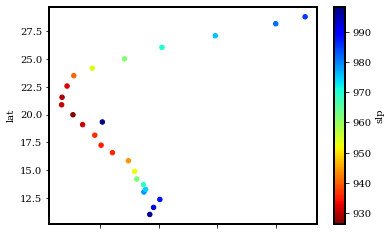

In [106]:
dfslp.plot(kind = "scatter", x = "lon", y = "lat", c = "slp", cmap = "jet_r")

In [117]:
def ret_wspd(slp, level_name = "lev"):
    slps = []
    for i in range(len(slp)):
        slpmin = slp[i].where(slp[i]==slp[i].max(), drop=True)
        slps.append(slpmin)
    slpmindf = xr.concat(slps, dim = "time").to_dataframe()
    slpmins = slpmindf.drop_duplicates().dropna().drop(level_name, 
                                                       axis = 1
                                                      ).reset_index(
    ).set_index("time").resample("6H").mean()
    return slpmins

In [118]:
wspd = ret_wspd(ds['wspd'].sel(lev = 1000), level_name="lev")

In [140]:
def decorat(ax,t=False,b=False,l=False,r=False):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = t
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlabels_bottom = b
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'light','family':'serif'}
    gl.ylabel_style = {'weight': 'light','family':'serif'}

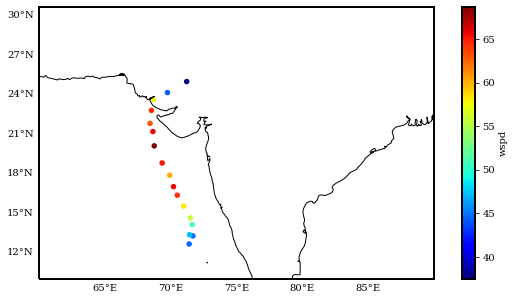

In [148]:
plt.figure(figsize = [10, 5])
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([60, 90, 10, 30])
wspd.where(wspd.wspd>=35).dropna().plot(kind = "scatter", x = "lon", y = "lat", c = "wspd", cmap = "jet", ax= ax)
decorat(ax, b = True, l = True)